## The Dataset
The reason for the premature leaving of the best and most experienced employees. 

### Aim 
Try to predict which valuable employees will leave next. 

##### Fields in the dataset include:
<ol>
<li>Satisfaction Level</li>
<li>Last evaluation</li>
<li>Number of projects</li>
<li>Average monthly hours</li>
<li>Time spent at the company</li>
<li>Whether they have had a work accident</li>
<li>Whether they have had a promotion in the last 5 years</li>
<li>Departments (column sales)</li>
<li>Salary</li>
<li>Whether the employee has left</li>
</ol>

# Explorative Data Analysis

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')
plt.style.use('ggplot')

%matplotlib inline

In [106]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [107]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'left'],
      dtype='object')

In [108]:
df.groupby('left').describe()

Work_accident                                               \
             count      mean       std  min  25%  50%  75%  max   
left                                                              
0          11428.0  0.175009  0.379991  0.0  0.0  0.0  0.0  1.0   
1           3571.0  0.047326  0.212364  0.0  0.0  0.0  0.0  1.0   

     average_montly_hours              ...  satisfaction_level        \
                    count        mean  ...                 75%   max   
left                                   ...                             
0                 11428.0  199.060203  ...                0.84  1.00   
1                  3571.0  207.419210  ...                0.73  0.92   

     time_spend_company                                                
                  count      mean       std  min  25%  50%  75%   max  
left                                                                   
0               11428.0  3.380032  1.562348  2.0  2.0  3.0  4.0  10.0  
1                3571.0  3.876505  0.977698  2.0  3.0  4.0  5.0   6.0  

[2 rows x 56 columns]

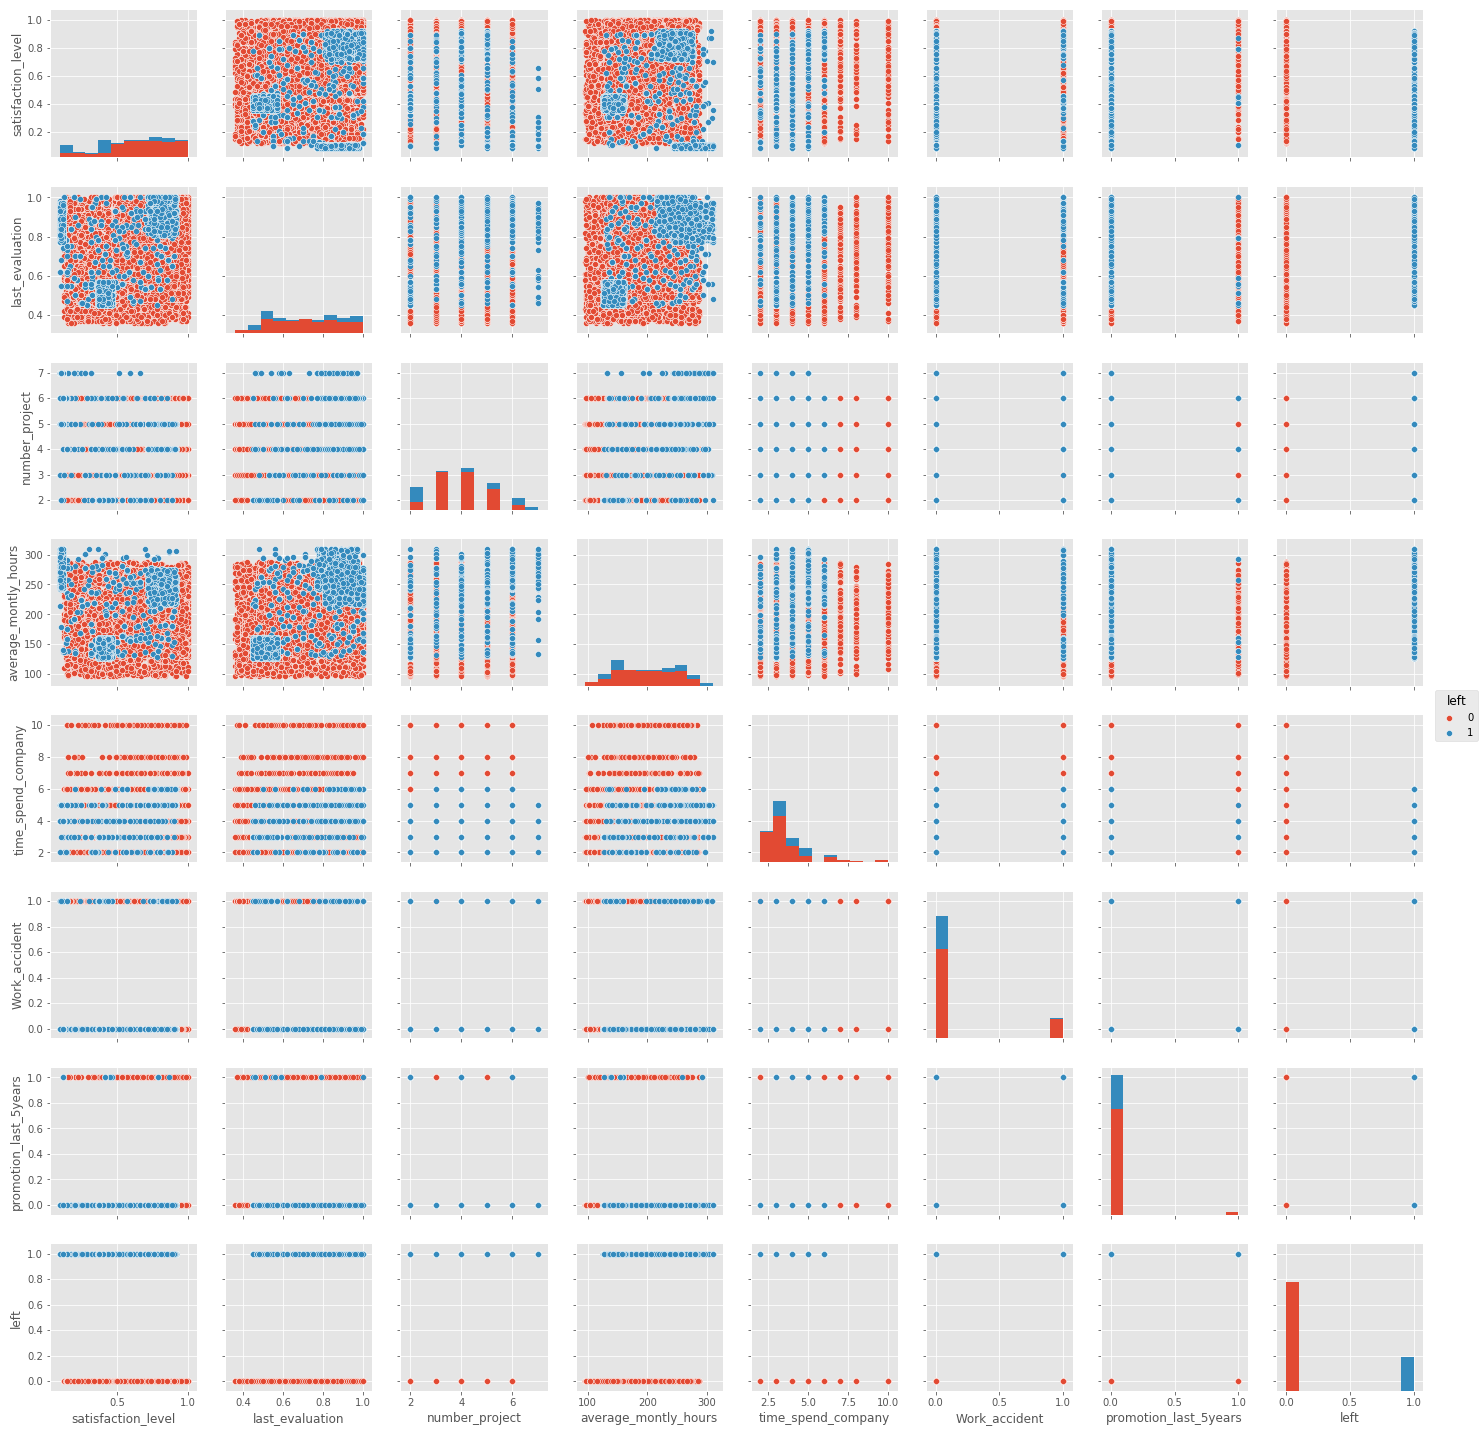

In [109]:
sns.pairplot(df, hue='left')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


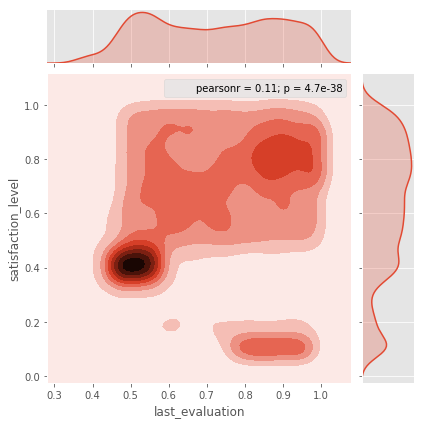

In [111]:
sns.jointplot(x=df['last_evaluation'], y=df['satisfaction_level'], kind='kde')

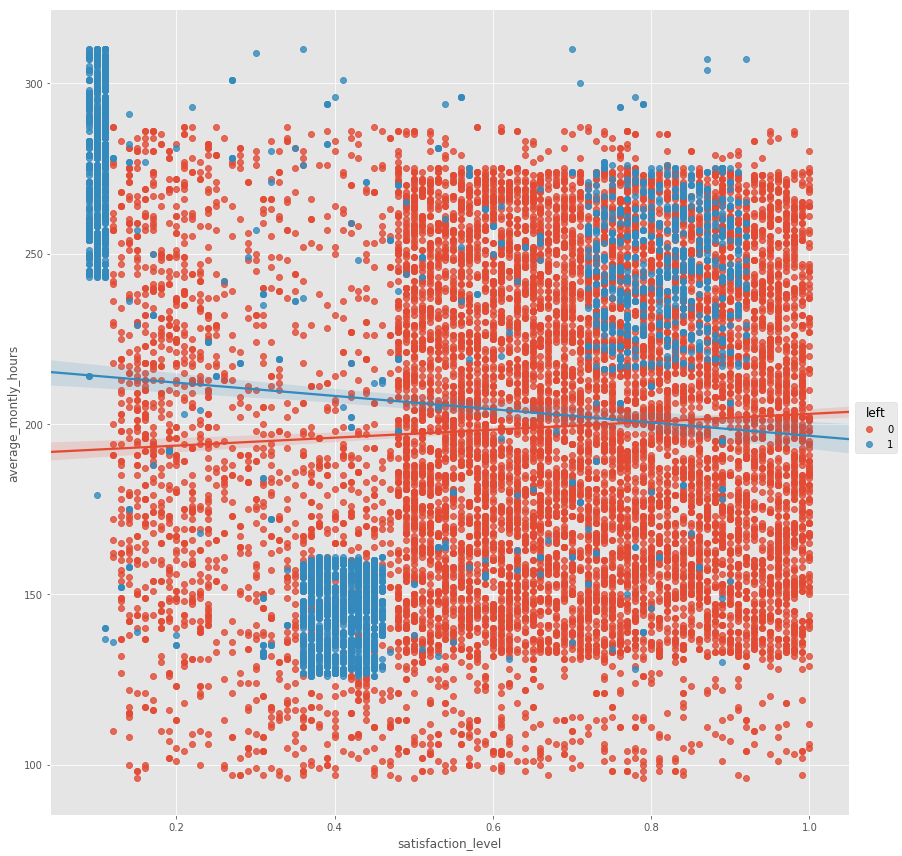

In [112]:
sns.lmplot(data=df, x='satisfaction_level', y='average_montly_hours', size=12, hue='left')

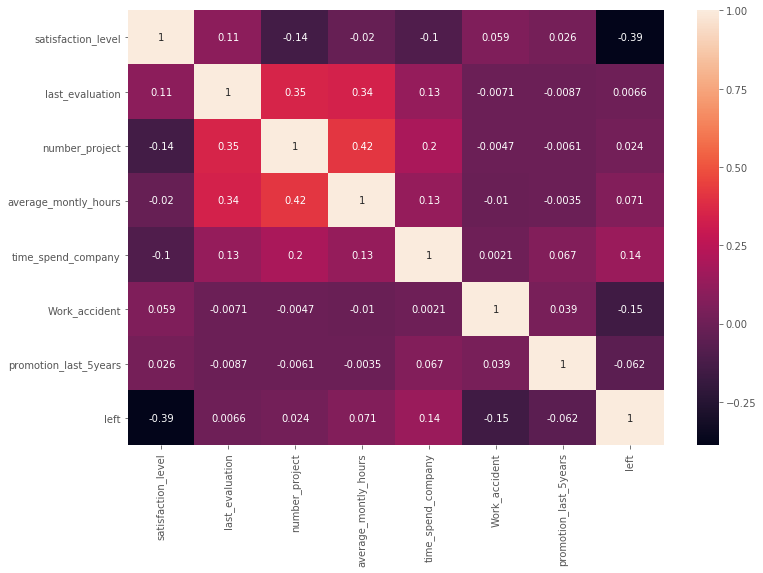

In [113]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

C:\Users\ArpitJainMr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


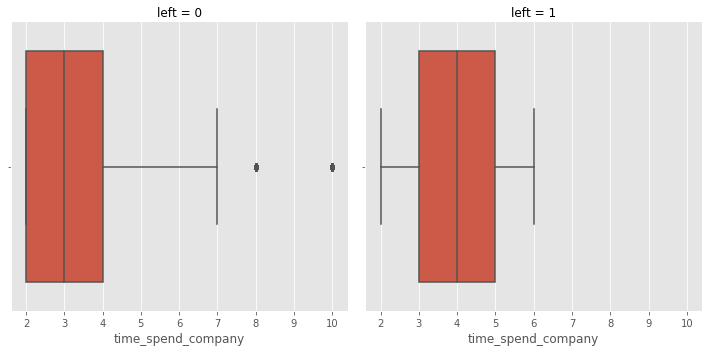

In [114]:
g = sns.FacetGrid(df, col = 'left', size=5)
g.map(sns.boxplot, 'time_spend_company')

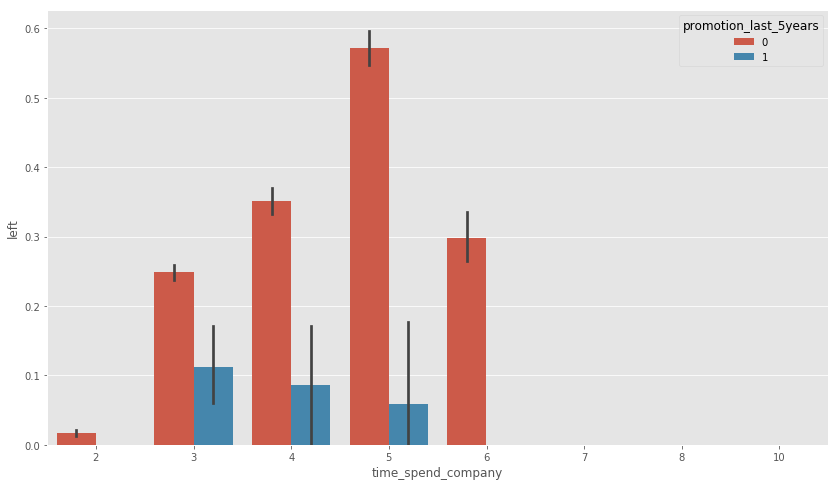

In [115]:
#time spend with promotion
plt.figure(figsize=(14,8))
sns.barplot(x='time_spend_company', y = 'left', hue = 'promotion_last_5years', data = df)

# Data Transformation

In [116]:
sal_dummy = pd.get_dummies(df['salary'])
df_new = pd.concat([df, sal_dummy], axis=1)

In [117]:
df_new.drop('salary', axis=1, inplace=True)

In [118]:
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,left,high,low,medium
0,0.38,0.53,2,157,3,0,0,sales,1,0,1,0
1,0.80,0.86,5,262,6,0,0,sales,1,0,0,1
2,0.11,0.88,7,272,4,0,0,sales,1,0,0,1
3,0.72,0.87,5,223,5,0,0,sales,1,0,1,0
4,0.37,0.52,2,159,3,0,0,sales,1,0,1,0


In [119]:
X = df_new.drop(['sales', 'left', 'high'], axis=1)
y = df_new['left']

# Data Predictions

## 1. Random Forest Classifier

In [120]:
from sklearn.cross_validation import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rfc = RandomForestClassifier(n_estimators=100)

In [124]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
pred = rfc.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix, classification_report

In [127]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[3760    9]
 [  47 1134]]


             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3769
          1       0.99      0.96      0.98      1181

avg / total       0.99      0.99      0.99      4950



In [128]:
rfc_score_train = rfc.score(X_train, y_train)
print('RFC Train Score:',rfc_score_train)
rfc_score_test = rfc.score(X_test, y_test)
print('RFC Test Score:',rfc_score_test)

RFC Train Score: 1.0
RFC Test Score: 0.9886868686868687


## 2. K Nearest Neighbors Classifier

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier(n_neighbors=10)

In [131]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [132]:
knn_pred = knn.predict(X_test)

In [133]:
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[3586  183]
 [ 109 1072]]


             precision    recall  f1-score   support

          0       0.97      0.95      0.96      3769
          1       0.85      0.91      0.88      1181

avg / total       0.94      0.94      0.94      4950



In [134]:
knn_score_train = knn.score(X_train, y_train)
print('KNN Train Score:', knn_score_train)
knn_score_test = knn.score(X_test, y_test)
print('KNN Test Score:', knn_score_test)

KNN Train Score: 0.9506418549109364
KNN Test Score: 0.941010101010101


## 3. Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
lreg = LogisticRegression()

In [137]:
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
reg_pred = lreg.predict(X_test)

In [139]:
print(confusion_matrix(y_test, reg_pred))
print('\n')
print(classification_report(y_test, reg_pred))

[[3480  289]
 [ 810  371]]


             precision    recall  f1-score   support

          0       0.81      0.92      0.86      3769
          1       0.56      0.31      0.40      1181

avg / total       0.75      0.78      0.75      4950



In [140]:
lreg_score_train = lreg.score(X_train, y_train)
print("Logistic Regression Train Score:", lreg_score_train)
lreg_score_test = lreg.score(X_test, y_test)
print('Logistic Regression Test Score:', lreg_score_test)

Logistic Regression Train Score: 0.7893322718678476
Logistic Regression Test Score: 0.777979797979798


# Relationships Analyzed
#### Exploring Further Relationships
<ol>
<li>Satisfaction level vs average monthly hours </li>
<li>Department with highest turnover</li>
<li>last evaluation vs satisfaction level</li>
<li>Deeper analysis of regretted attrition:
    <ul>
    <li>Did they have a recent promotion </li>
    <li>Did they spend too much time at work</li>
    <li>Work accident</li>
    <li>Number of projects</li>
    <li>Last evaluations</li>
    </ul>    
</li> 
</ol>    

In [141]:
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

In [142]:
df = pd.read_csv('HR_comma_sep.csv')
df.columns
df = df.rename(columns={'sales': 'department'})

In [143]:
#isolate the data of those that have quit (left)
dfleft = df[df["left"]==1]
dfstay = df[df["left"]==0]

In [144]:
#Did salary have an influence on the quitting rate of employees?
dfsalaryleft = dfleft.salary.value_counts().sort_index()
dfsalarystay = dfstay.salary.value_counts().sort_index()

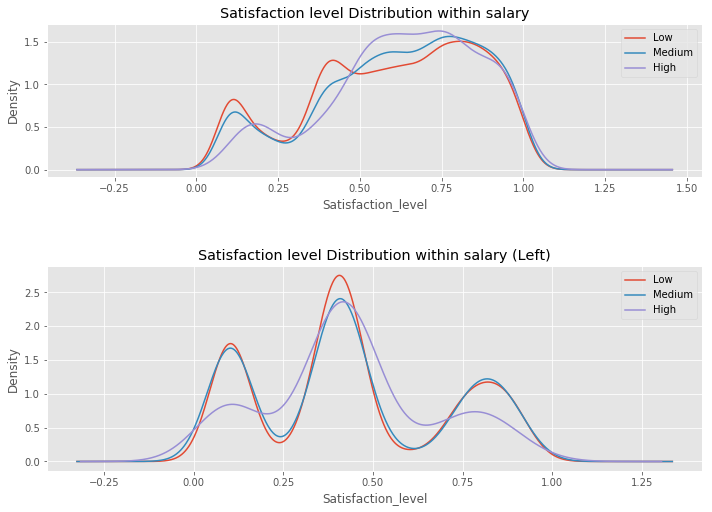

In [145]:
#A look into the distribution rates of Salary vs Satisfaction
fig = plt.figure(figsize=(10,20)) 

plt.subplot2grid((8,2),(0,0), colspan=2)
df.satisfaction_level[df.salary == 'low'].plot(kind='kde')    
df.satisfaction_level[df.salary == 'medium'].plot(kind='kde') 
df.satisfaction_level[df.salary == 'high'].plot(kind='kde') 
# plots an axis lable
plt.tight_layout()
plt.xlabel("Satisfaction_level")    
plt.title("Satisfaction level Distribution within salary")
# sets our legend for our graph.
plt.legend(('Low', 'Medium','High'),loc='best') 

plt.subplot2grid((6,2),(1,0), colspan=2)
dfleft.satisfaction_level[dfleft.salary == 'low'].plot(kind='kde')    
dfleft.satisfaction_level[dfleft.salary == 'medium'].plot(kind='kde') 
dfleft.satisfaction_level[dfleft.salary == 'high'].plot(kind='kde') 
# plots an axis lable
plt.xlabel("Satisfaction_level")    
plt.title("Satisfaction level Distribution within salary (Left)")
# sets our legend for our graph.
plt.legend(('Low', 'Medium','High'),loc='best')


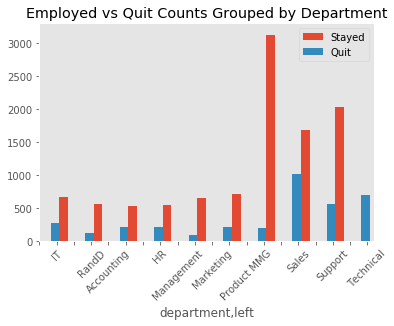

In [146]:
#An analysis of the Employed vs Left employees grouped by Department
depleft = df[['department','left']]
depleft1 = depleft.groupby(['department', 'left'])
ind = np.arange(20)                # the x locations for the groups
width = 0.35                      # the width of the bars
#print (depleft1['left'].value_counts())

#Without the hierarchical indexing
#print ("[Unstacking]")
depleft1sum = depleft1['left'].value_counts().unstack()
#print (depleft1sum)

ax = depleft1sum.plot(kind = 'bar', width = 1,  align='center')

ax.set_xlim(width)
ax.set_ylim(0,3300)
xTickMarks = ['','IT','','RandD','Accounting','','','HR','Management','','Marketing','','Product MMG','','','Sales','','Support','','Technical']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
ax.set_title('Employed vs Quit Counts Grouped by Department')
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.legend(('Stayed', 'Quit'),loc='best') 

#plt.ylabel(‘Num’)
plt.grid()
plt.show()

In [147]:
#Analysis of regretted attrition 
#last evalutions > .85, number_project > 5, promotion_last_5years = 1
#df[(df["LATITUDE"] == '37.869058') | (df["LONGITUDE"] == '-122.270455')]

retention = dfleft[(dfleft["number_project"] > 5) | (dfleft["promotion_last_5years"] == 1)| (dfleft["last_evaluation"] > .85)]
retention = retention[['satisfaction_level','last_evaluation','promotion_last_5years','salary','number_project']]
retention.head()

,satisfaction_level,last_evaluation,promotion_last_5years,salary,number_project
1,0.80,0.86,0,medium,5
2,0.11,0.88,0,medium,7
3,0.72,0.87,0,low,5
6,0.10,0.77,0,low,6
8,0.89,1.00,0,low,5


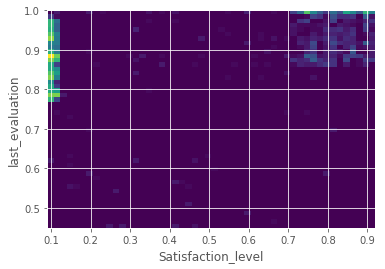

In [148]:
# Generate some test data
x = retention.satisfaction_level
y = retention.last_evaluation

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.xlabel('Satisfaction_level')
plt.ylabel('last_evaluation')
plt.show()

In [149]:
dummies=pd.get_dummies(df['department'],prefix='sales')
df=pd.concat([df,dummies],axis=1)
df.drop(['department'],axis=1,inplace=True)
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,0,low,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,medium,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,low,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,low,1,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,low,1,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,0,low,1,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,0,low,1,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,0,low,1,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,0,low,1,0,0,0,0,0,0,0,1,0,0


In [150]:
dfdeptleft = dfleft.department.value_counts().sort_index().to_frame()
dfdeptstay = dfstay.department.value_counts().sort_index()
dfdeptleft = df.left.value_counts().sort_index().to_frame()
dfdeptleft.head()

,left
0,11428
1,3571


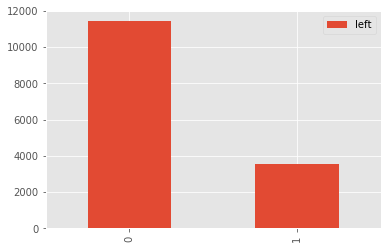

In [151]:
gbl_df = dfdeptleft
gbl_df.plot(kind = 'bar')
plt.show()